polynomial regression


why we use polynomial regression if we have non linear data then we can't handle by

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
data_set=pd.read_csv("/content/Position_Salaries.csv")
data_set.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [16]:
x=data_set.iloc[:,1:2].values
y=data_set.iloc[:,2].values

In [17]:
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [18]:
from sklearn.linear_model import LinearRegression
lin_regs=LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

In [19]:
lin_regs.score(x,y) # score check

0.6690412331929895

In [20]:
# fitting the polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
lin_regs2=LinearRegression()
lin_regs2.fit(x_poly,y)

LinearRegression()

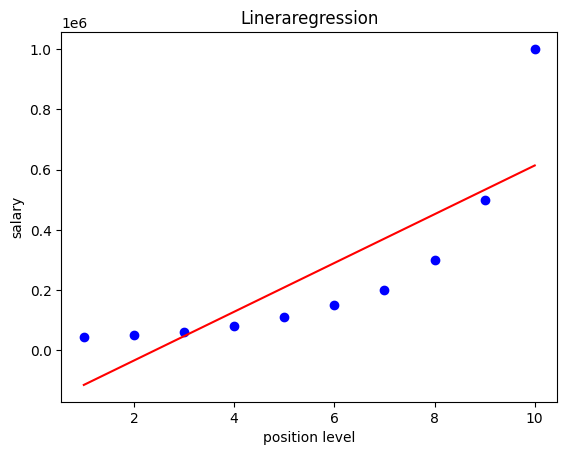

In [21]:
plt.scatter(x,y,color="blue")
plt.plot(x,lin_regs.predict(x),color="red")
plt.title("Lineraregression")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

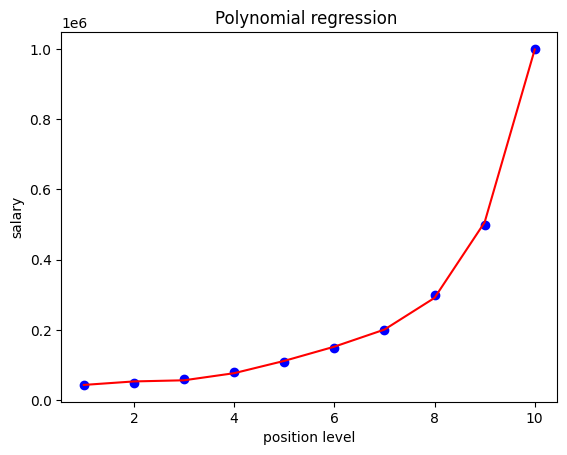

In [22]:
## result of polynomial regression and graph is curve shape
plt.scatter(x,y,color="blue")
plt.plot(x,lin_regs2.predict(poly_reg.fit_transform(x)),color="red")
plt.title("Polynomial regression ")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

# Logistic regression

linear is used for solve regression problem and logistic used for calssification problem and the graph shape is h shape  

it is used for categorical  value mean like probability in yes or no and 1 or 2

it is predict the output  categorical dependent variable  

# it divide into three part in mid threesold value and below  threesold any value have then it take 0 and above threesold any value have take 1  it have two calss positive and negative and h shape represent logistic function or sigmoidic

# the foumula of y=1/1+e^-x   and e=2.718
e=euler cofficient
y=dependent variable
x=independent variable

the whole formula is called sigmoid function

and it is work that actual value change into probability value

logistic regression are divdide into three part
binomial,
multinomial,
ordinal

in binomial output come in yes or no  


in multinomial more than two output come and it is unordered form mean no rank
ex:- selection of animal but it is unordered form

in ordinal more than two output come and it is ordered form
ex:- result grade a,b,c,d more than two output and ordered form

second data

In [23]:
import pandas as pd
df = pd.read_csv("/content/cust_satisfaction.csv")
df.head()


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13.0,460.0,5.0,4.0,5.0,25.0,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25.0,235.0,1.0,3.0,1.0,1.0,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26.0,1142.0,5.0,4.0,5.0,0.0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25.0,562.0,2.0,3.0,2.0,11.0,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61.0,214.0,3.0,4.0,3.0,0.0,0.0


In [45]:
df.shape

(76166, 12)

In [24]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       62427
disloyal Customer    14052
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76479 entries, 0 to 76478
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      76479 non-null  object 
 1   Customer Type               76479 non-null  object 
 2   Type of Travel              76479 non-null  object 
 3   Class                       76479 non-null  object 
 4   satisfaction                76478 non-null  object 
 5   Age                         76478 non-null  float64
 6   Flight Distance             76478 non-null  float64
 7   Inflight entertainment      76478 non-null  float64
 8   Baggage handling            76478 non-null  float64
 9   Cleanliness                 76478 non-null  float64
 10  Departure Delay in Minutes  76478 non-null  float64
 11  Arrival Delay in Minutes    76252 non-null  float64
dtypes: float64(7), object(5)
memory usage: 7.0+ MB


In [26]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    1
Age                             1
Flight Distance                 1
Inflight entertainment          1
Baggage handling                1
Cleanliness                     1
Departure Delay in Minutes      1
Arrival Delay in Minutes      227
dtype: int64

In [27]:
df.dropna(inplace=True)  # dropna drop null value

In [28]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [29]:
df.duplicated().sum()

86

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

In [32]:
loyal_cust=df[df['Customer Type']=='Loyal Customer']
disloyal_cust=df[df['Customer Type']=='disloyal Customer']

In [33]:
loyal_cust.value_counts()

Gender  Customer Type   Type of Travel   Class     satisfaction             Age   Flight Distance  Inflight entertainment  Baggage handling  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes
Female  Loyal Customer  Business travel  Business  neutral or dissatisfied  7.0   1998.0           2.0                     4.0               2.0          15.0                        14.0                        1
Male    Loyal Customer  Business travel  Business  satisfied                48.0  1739.0           4.0                     4.0               5.0          5.0                         5.0                         1
                                                                                  1514.0           3.0                     3.0               3.0          0.0                         0.0                         1
                                                                                                   5.0                     5.0               3.0          0.0

In [34]:
loyal_customer=loyal_cust.sample(21000)  # there are big gap between length so add 21000

In [47]:
balace_df=pd.concat([loyal_customer,disloyal_cust],axis=0)
balace_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
7146,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied,53.0,2455.0,1.0,2.0,1.0,182.0,155.0
38477,Female,Loyal Customer,Business travel,Business,satisfied,26.0,546.0,4.0,4.0,4.0,0.0,0.0
3500,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,47.0,120.0,1.0,4.0,3.0,0.0,0.0
45303,Male,Loyal Customer,Business travel,Business,satisfied,28.0,3147.0,5.0,4.0,5.0,0.0,8.0
69968,Female,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,61.0,2161.0,5.0,4.0,2.0,180.0,145.0


In [36]:
cat_col=df.select_dtypes(include='O')
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
76473,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
76474,Female,Loyal Customer,Business travel,Business,satisfied
76475,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
76476,Female,Loyal Customer,Business travel,Business,satisfied


In [37]:
num_col=df.select_dtypes(exclude='O')
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13.0,460.0,5.0,4.0,5.0,25.0,18.0
1,25.0,235.0,1.0,3.0,1.0,1.0,6.0
2,26.0,1142.0,5.0,4.0,5.0,0.0,0.0
3,25.0,562.0,2.0,3.0,2.0,11.0,9.0
4,61.0,214.0,3.0,4.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...
76473,37.0,1052.0,3.0,5.0,3.0,8.0,0.0
76474,18.0,265.0,4.0,5.0,4.0,0.0,0.0
76475,67.0,438.0,3.0,4.0,4.0,104.0,101.0
76476,58.0,3490.0,4.0,4.0,3.0,12.0,6.0


In [48]:
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
76473,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
76474,Female,Loyal Customer,Business travel,Business,satisfied
76475,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
76476,Female,Loyal Customer,Business travel,Business,satisfied


In [38]:
ghnmfrom sklearn.preprocessing import LabelEncoder,OneHotEncoder # one hoe encoding in o and 1

In [39]:
encoder=OneHotEncoder(drop='if_binary')

In [40]:
encoder=OneHotEncoder()

In [41]:
print(OneHotEncoder.__doc__) # for see document parameter use this


    Encode categorical features as a one-hot numeric array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
    encoding scheme. This creates a binary column for each category and
    returns a sparse matrix or dense array (depending on the ``sparse_output``
    parameter)

    By default, the encoder derives the categories based on the unique values
    in each feature. Alternatively, you can also specify the `categories`
    manually.

    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.

    Note: a one-hot encoding of y labels should use a LabelBinarizer
    instead.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.

    Parameters
    ----------
    categories : 'auto' or a list of

In [42]:
onehot_data=encoder.fit_transform(cat_col).toarray() # fit data and change into array

In [43]:
onehot_data

array([[0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [44]:
onehot_data.shape

(76166, 11)

In [50]:
column_names=list(encoder.get_feature_names_out()) # give teh feature of encoder

In [51]:
column_names

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_neutral or dissatisfied',
 'satisfaction_satisfied']

In [53]:
one_hot=pd.DataFrame(onehot_data,columns=column_names) # all cat column convert into int
one_hot

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
76161,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
76162,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
76163,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
76164,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [60]:
final_df=pd.concat([one_hot,num_col],axis=1)
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,460.0,5.0,4.0,5.0,25.0,18.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,235.0,1.0,3.0,1.0,1.0,6.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,26.0,1142.0,5.0,4.0,5.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,562.0,2.0,3.0,2.0,11.0,9.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,61.0,214.0,3.0,4.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76161,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,1052.0,3.0,5.0,3.0,8.0,0.0
76162,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,18.0,265.0,4.0,5.0,4.0,0.0,0.0
76163,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,67.0,438.0,3.0,4.0,4.0,104.0,101.0
76164,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,58.0,3490.0,4.0,4.0,3.0,12.0,6.0


In [59]:
num_col.reset_index(drop=True,inplace=True)

In [61]:
final_df

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,13.0,460.0,5.0,4.0,5.0,25.0,18.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,235.0,1.0,3.0,1.0,1.0,6.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,26.0,1142.0,5.0,4.0,5.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,562.0,2.0,3.0,2.0,11.0,9.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,61.0,214.0,3.0,4.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76161,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,1052.0,3.0,5.0,3.0,8.0,0.0
76162,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,18.0,265.0,4.0,5.0,4.0,0.0,0.0
76163,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,67.0,438.0,3.0,4.0,4.0,104.0,101.0
76164,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,58.0,3490.0,4.0,4.0,3.0,12.0,6.0


In [62]:
final_df.to_csv('final_df.csv',index=False) # convert into csv

In [63]:
x=final_df.drop('Customer Type_disloyal Customer',axis=1)
y=final_df['Customer Type_disloyal Customer']